# Lab 1.1 - Cleaning and Analyzing Warehouse Data

## Objective
1. Import a CSV dataset using `pandas`
2. Clean the dataset using multiple techniques
3. Answer questions about using the data. 

*Use the challenge dataset to practice cleaning with regex.*

## Rubric

- 6 pts - Contains all required components and uses professional language
- 5 pts - Contains all required components, but uses unprofessional language, formating, etc. 
- 4 pts - Contains some, but not all, of the required components
- 3 pts - Did not submit

## Pandas reference

In addtion to the methods you learned last lab, you may need the following: 

- `df.dtypes` - the data types of the each column
- `df.columns` - the name of each column
- `df.shape` - the number of rows and columns of the dataset
- `df.dropna()` - removes null values
- `pd.todatetime(...)` - sets a given column to a `datetime` object
- `df.column.isunique` - returns True if all data are unique
- `df.column.unique()` - returns all of the uniue values of a column
- `df['col'].replace(...,...)` - replaces values in a column with another value
- `df['col'].value_counts()` - returns the value counts of each unique value
- `df['col'].quantile(0.25) or .quartile(0.75) ` - returns the value at 25% or 75% precent    

## Preparing Data

In this section, we will import and prepare our data to be manipulated

Import `pandas` and `matploutlib,pyplot` here.

In [69]:
import pandas as pd
import matplotlib as plt

Use `pandas`' `read_csv()` to create a Dataframe called `warehouse`.

In [70]:
df = pd.read_csv("warehouse_data.csv")

Display the first 5 rows of `warehouse`.

In [71]:
df.head(5)

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True


Display the column names of the Dataframe. 

In [72]:
df.columns

Index(['order_id', 'customer_id', 'date', 'nearest_warehouse', 'shopping_cart',
       'order_price', 'delivery_charges', 'customer_lat', 'customer_long',
       'coupon_discount', 'order_total', 'season', 'is_expedited_delivery',
       'distance_to_nearest_warehouse', 'latest_customer_review',
       'is_happy_customer'],
      dtype='object')

How many data points are in our table?

In [73]:
x,y = df.shape
print(x*y)

8000


We can use one command to answer these three questions: 
- What is the average coupon discount?
- What is the largest order price?
- What is the smallest distance to warehouse?

In [74]:
df.describe()

,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,distance_to_nearest_warehouse
count,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02,500.000000
mean,25522.216000,76.658200,-35.835234,144.969494,10.890000,3.920967e+04,2.204224
std,86333.729169,14.481465,12.045393,0.022720,8.649134,2.741940e+05,8.812416
min,585.000000,46.350000,-37.827123,144.924967,0.000000,6.392900e+02,0.107800
25%,7050.000000,65.982500,-37.818222,144.953488,5.000000,6.454735e+03,0.751425
50%,12807.500000,76.310000,-37.812165,144.965357,10.000000,1.129396e+04,1.030100
75%,20360.000000,82.555000,-37.805364,144.983985,15.000000,1.811919e+04,1.408625
max,947691.000000,114.040000,37.826339,145.019837,25.000000,5.688270e+06,94.973400


## Cleaning Data

**Data cleaning** is the process of removing errors and inaccuracies from data to make it ready for analysis In these next steps, we will explore and clean our dataset. 


Check the dataset for null(or empty) values. How many null values are there and in which columns?

In [75]:

df.isnull().sum()

order_id                         0
customer_id                      0
date                             0
nearest_warehouse                0
shopping_cart                    0
order_price                      0
delivery_charges                 0
customer_lat                     0
customer_long                    0
coupon_discount                  0
order_total                      0
season                           8
is_expedited_delivery            0
distance_to_nearest_warehouse    0
latest_customer_review           1
is_happy_customer                0
dtype: int64

So `season` and `latest_customer_review` have missing values. Fill the drop the rows with missing values. You should have 491 rows remaining.

In [76]:
df.dropna()

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


Now let's take a look at the data types of each column and see if they make sense.

In [77]:
df.dtypes

order_id                          object
customer_id                       object
date                              object
nearest_warehouse                 object
shopping_cart                     object
order_price                        int64
delivery_charges                 float64
customer_lat                     float64
customer_long                    float64
coupon_discount                    int64
order_total                      float64
season                            object
is_expedited_delivery               bool
distance_to_nearest_warehouse    float64
latest_customer_review            object
is_happy_customer                   bool
dtype: object

Data type of date column is object instead of datetime. So fix this problem and check the datatypes again.

In [78]:
df['date'] = pd.to_datetime(df['date'])

Now let's check for errors. 

First, let's make sure that our data in `order_id` is unique and we don't have any duplicates. 

In [79]:
df.order_id.is_unique

True

Now, let's check what the unique values of warehouse are.

In [80]:
df.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers', 'nickolson', 'thompson'],
      dtype=object)

Thompson and thompson should be the same, but here they are being counted as different warehouse. Similarly Nickolson and nickolson are same. Change all of the lowercase names to Title case. 

In [81]:
df['nearest_warehouse'] = df['nearest_warehouse'].str.capitalize()
df.nearest_warehouse.unique()

array(['Thompson', 'Nickolson', 'Bakers'], dtype=object)

Check the quantities of each warehouse.

In [82]:
df['nearest_warehouse'].value_counts()

nearest_warehouse
Thompson     197
Nickolson    184
Bakers       119
Name: count, dtype: int64

The value counts should be Thompson: 197, Nickolson: 184, Bakers: 119

Check the counts and unique values of `is_happy_customer`.

In [83]:
df["is_happy_customer"].value_counts

<bound method IndexOpsMixin.value_counts of 0       True
1      False
2       True
3      False
4       True
       ...  
495    False
496    False
497     True
498     True
499    False
Name: is_happy_customer, Length: 500, dtype: bool>

Create a table with `order_price`, `delivery_charges`, `coupon_discount`, and `order_total`. Look at the first 10 rows. Is the `order_total` column correct?

In [84]:
df2 = df[["order_price", "delivery_charges","coupon_discount", "order_total"]]
df2.head(10)

,order_price,delivery_charges,coupon_discount,order_total
0,12200,79.89,10,11059.89
1,9080,62.71,0,9142.71
2,10670,65.87,10,9668.87
3,24800,57.61,15,21137.61
4,9145,75.54,25,6934.29
5,7810,71.22,10,7100.22
6,13700,74.84,5,13089.84
7,7960,52.28,5,10789.79
8,25390,107.58,10,22958.58
9,13320,62.26,15,11384.26


### Remove Outliers

We are going to remove statistical outliers in `order_total`. To remove outliers, follow this process:

- Find upper and lower quartiles
- Find IQR range
- Find upper and lower limit
- Remove elements 

In [85]:

Q1 = df["order_total"].quantile(0.25)
Q3 = df["order_total"].quantile(0.75)
IQ = Q3 - Q1
lower = Q1 - 1.5 * IQ
upper = Q3 + 1.5 * IQ
df = df[df["order_total"] < 35625.86625]
df = df[df["order_total"] > -11041.943749999999]
print(Q1)
print(Q3)
print(IQ)
print(lower)
print(upper)



6454.735
18119.1875
11664.4525
-11041.943749999999
35615.86625


In [86]:
df

,order_id,customer_id,date,nearest_warehouse,shopping_cart,order_price,delivery_charges,customer_lat,customer_long,coupon_discount,order_total,season,is_expedited_delivery,distance_to_nearest_warehouse,latest_customer_review,is_happy_customer
0,ORD182494,ID6197211592,2019-06-22,Thompson,"[('Lucent 330S', 1), ('Thunder line', 2), ('iS...",12200,79.89,-37.815105,144.932843,10,11059.89,Winter,True,1.2800,perfect phone and trusted seller. phone itself...,True
1,ORD395518,ID0282825849,2019-12-29,Thompson,"[('Thunder line', 1), ('Universe Note', 2)]",9080,62.71,-37.802736,144.951118,0,9142.71,Summer,False,1.1621,it keeps dropping calls the wifi don't work th...,False
2,ORD494479,ID0579391891,2019-03-02,Nickolson,"[('Thunder line', 1), ('pearTV', 2)]",10670,65.87,-37.821302,144.957581,10,9668.87,Autumn,False,1.0949,five stars this is a great cheap phone.,True
3,ORD019224,ID4544561904,2019-01-12,Nickolson,"[('Universe Note', 1), ('Alcon 10', 2), ('Oliv...",24800,57.61,-37.811416,144.973073,15,21137.61,Summer,False,0.8571,charger did not fit the charger didn't fit.,False
4,ORD104032,ID6231506320,2019-11-28,Nickolson,"[('Universe Note', 1), ('Olivia x460', 1), ('i...",9145,75.54,37.823859,144.969892,25,6934.29,Spring,False,0.5867,four stars good,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,ORD475510,ID0247417082,2019-08-07,Nickolson,"[('Alcon 10', 2), ('iAssist Line', 2)]",386776,59.70,-37.817662,144.970405,10,20174.70,Winter,True,0.1282,i bought this phone to send to my sister in .....,False
496,ORD086060,ID0130015098,2019-03-28,Nickolson,"[('pearTV', 2), ('Candle Inferno', 2), ('Toshi...",22120,62.29,-37.815469,144.968083,0,22182.29,Autumn,True,0.3711,one star it was the wrong phone,False
497,ORD079320,ID2707985442,2019-10-16,Nickolson,"[('pearTV', 1), ('Alcon 10', 1), ('Lucent 330S...",16490,106.98,-37.805979,144.966101,0,16596.98,Spring,True,1.4368,love this phone! has many great features!,True
498,ORD026546,ID0060088412,2019-05-19,Nickolson,"[('iStream', 1), ('Candle Inferno', 1), ('iAss...",5030,79.89,37.820071,144.984435,10,4606.89,Autumn,True,1.3191,spoiled son's birthday present son wanted one ...,True


There are 18 records with outliers to remove. 

## Explore Data

Now that our data is clean, we can answer questions about it!

What is the largest order?

In [87]:
df["order_total"].max()

33947.06

What is the smallest order?

In [88]:
df["order_total"].min()

639.29

Without outliers, what are the top 5 most expensive orders?

In [89]:
df["order_total"].nlargest(5)


487    33947.06
276    33706.75
14     31979.78
10     31973.25
78     31758.08
Name: order_total, dtype: float64

What warehouse is the closest to most customers? Create a visualization.

Text(0.5, 1.0, 'warehouse closest to the most customers')

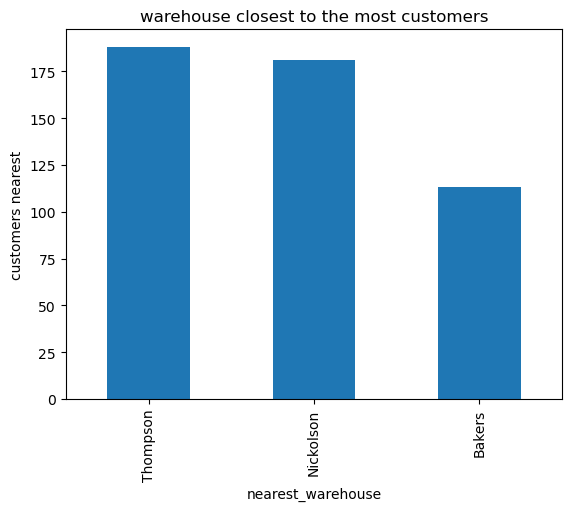

In [97]:
import matplotlib.pyplot as plt
df["nearest_warehouse"].value_counts().plot(kind='bar')
plt.ylabel('customers nearest')
plt.title("warehouse closest to the most customers")

What percentage of customers are satisfied with their purchase? Create a visualization.

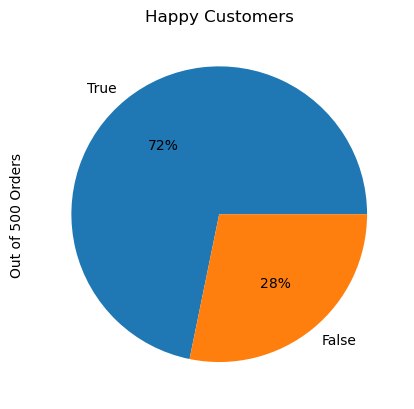

In [95]:
import matplotlib.pyplot as plt

df["is_happy_customer"].value_counts().plot(kind='pie',title='Happy Customers', autopct='%1.0f%%')

plt.ylabel('Out of 500 Orders')  # Manually setting the y-label
plt.show()
